In [174]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import collections
import sys
import os
import re
#import ggplot
#%load_ext rpy2.ipython
#from rpy2.robjects import pandas2ri
from os.path import expanduser
from sklearn.decomposition import PCA
from factor_analyzer import FactorAnalyzer, calculate_bartlett_sphericity, calculate_kmo

cwd = os.getcwd()
print(cwd)
#pandas2ri.activate()
sys.path.insert(0, '%s/../'%cwd)
from utilities import *
%load_ext autoreload
%autoreload 2

/Users/behnamrasoolian/git/exploit_devel/data_mining/ch04
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
columns = [item.strip() for item in """
Median house value;Median income;Housing median age;Total rooms;Total bedrooms;Population;Households;Latitude;Longitude
""".split(';')]
df = pd.read_csv('../data_sets/cadata.txt', skiprows=27, delimiter=r'\s+', header=None)
df.columns = columns

In [24]:
df.sample(10)

,Median house value,Median income,Housing median age,Total rooms,Total bedrooms,Population,Households,Latitude,Longitude
15396,272200.0,4.1500,14.0,3337.0,571.0,1385.0,512.0,33.23,-117.08
4605,500001.0,15.0001,52.0,2248.0,255.0,813.0,265.0,34.07,-118.33
11929,136800.0,4.0625,21.0,2468.0,380.0,1164.0,385.0,33.94,-117.38
7017,169500.0,3.6875,39.0,936.0,194.0,691.0,211.0,33.98,-118.09
19029,146200.0,4.9583,28.0,1967.0,315.0,734.0,291.0,38.36,-122.01
1630,401800.0,7.6917,32.0,3633.0,508.0,1393.0,506.0,37.88,-122.17
16534,106300.0,3.3750,4.0,58.0,29.0,79.0,29.0,37.78,-121.20
13562,122200.0,3.8292,36.0,1734.0,280.0,604.0,259.0,34.15,-117.28
16289,73900.0,1.7694,28.0,3308.0,766.0,3201.0,720.0,37.92,-121.30
4861,500001.0,0.4999,29.0,515.0,229.0,2690.0,217.0,34.02,-118.28


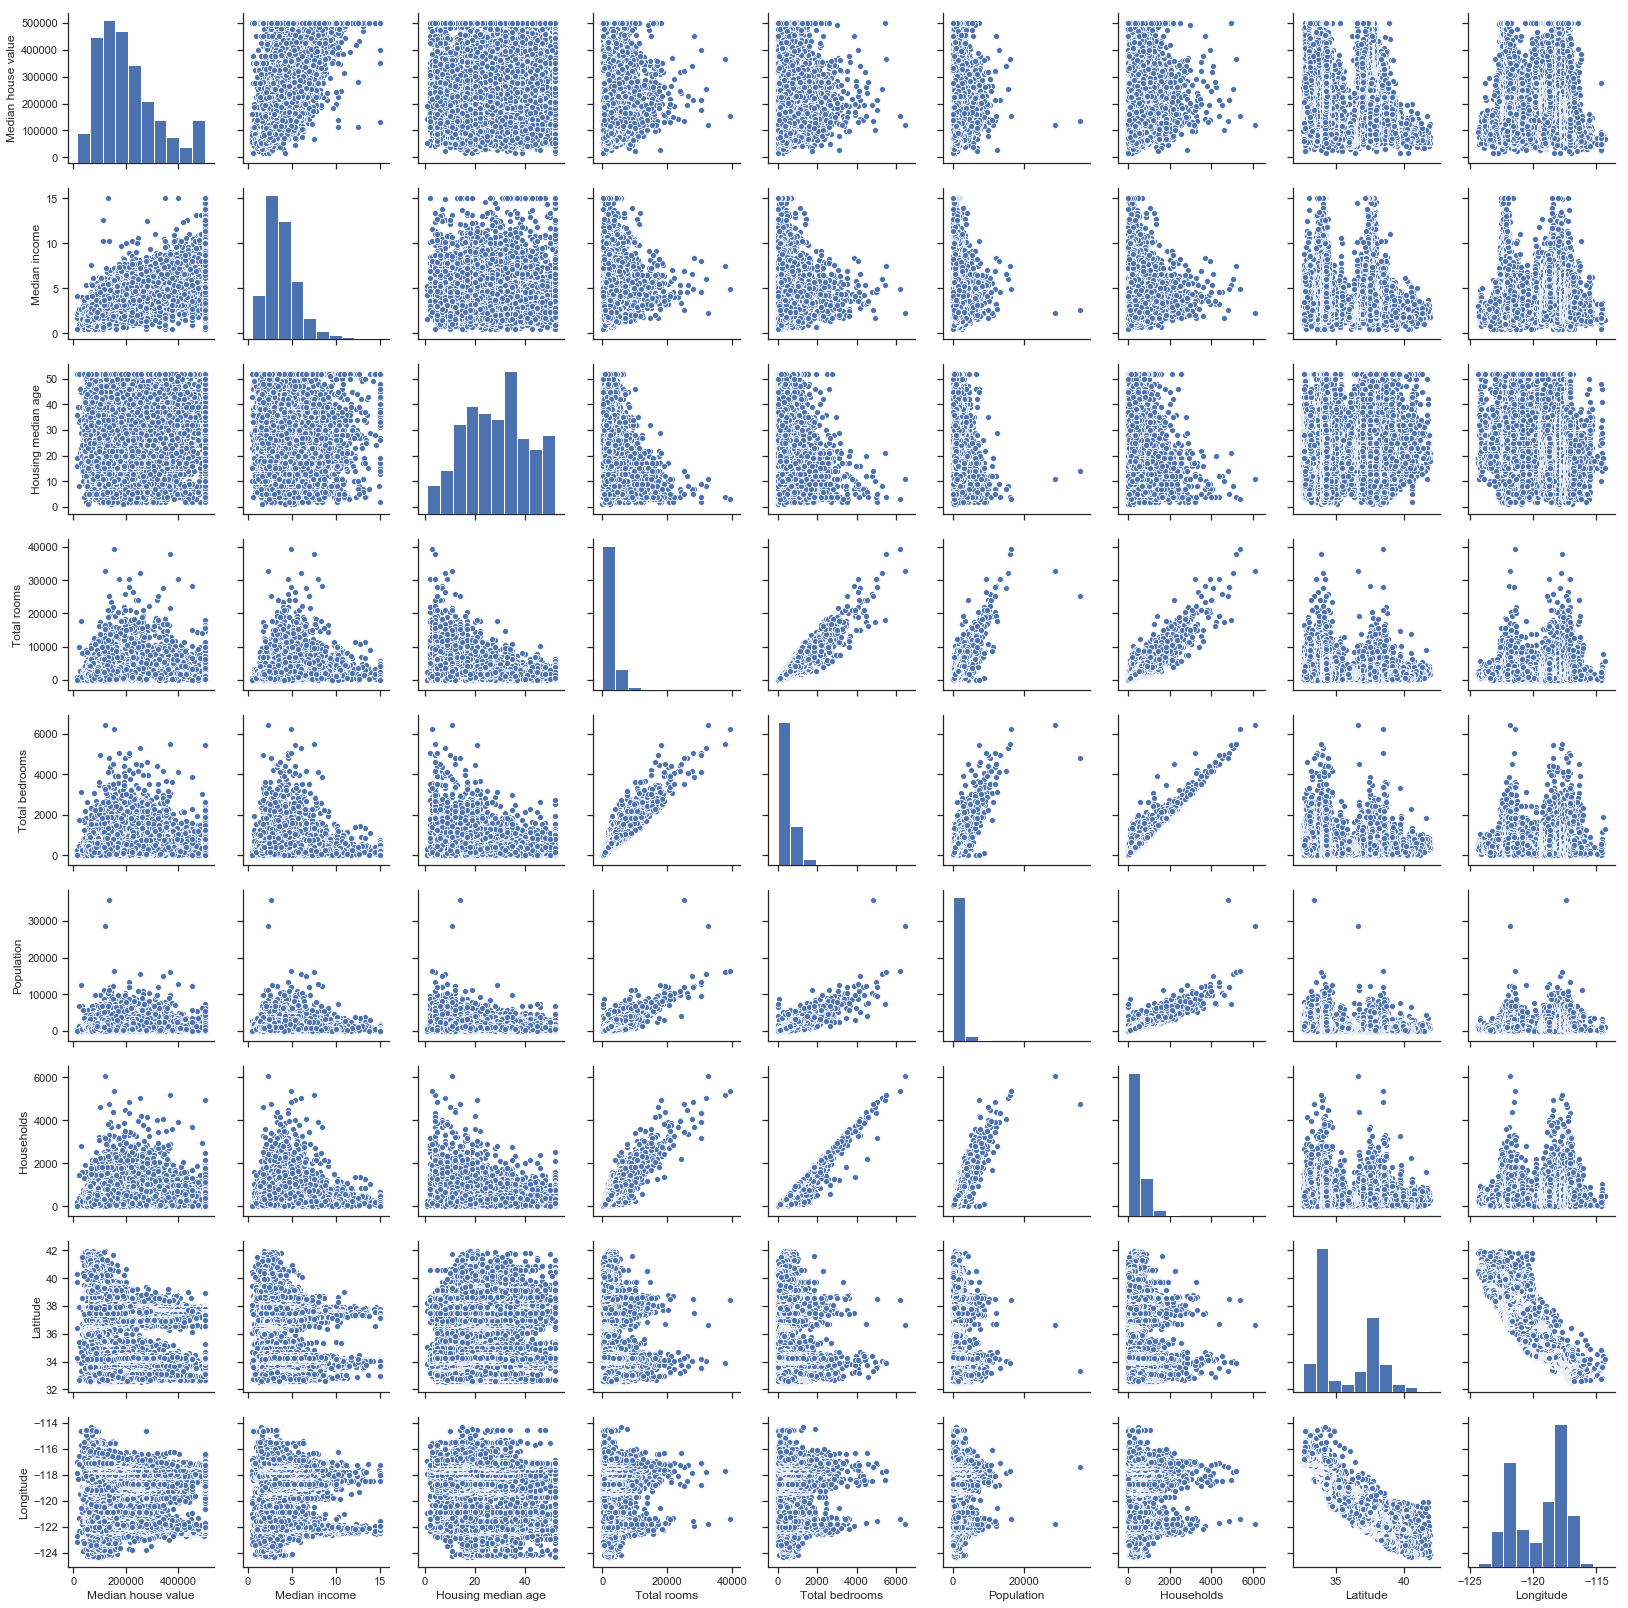

In [4]:
sns.set(style="ticks")
sns.pairplot(df)

In [25]:
dfNoResponseVariable = df[columns[1:]]
dfNoResponseVariable_z = (dfNoResponseVariable - dfNoResponseVariable.mean())/dfNoResponseVariable.std()

In [27]:
dfNoResponseVariable_z.corr()

,Median income,Housing median age,Total rooms,Total bedrooms,Population,Households,Latitude,Longitude
Median income,1.000000,-0.119034,0.198050,-0.008093,0.004834,0.013033,-0.079809,-0.015176
Housing median age,-0.119034,1.000000,-0.361262,-0.320485,-0.296244,-0.302916,0.011173,-0.108197
Total rooms,0.198050,-0.361262,1.000000,0.929893,0.857126,0.918484,-0.036100,0.044568
Total bedrooms,-0.008093,-0.320485,0.929893,1.000000,0.878026,0.979829,-0.066318,0.068378
Population,0.004834,-0.296244,0.857126,0.878026,1.000000,0.907222,-0.108785,0.099773
Households,0.013033,-0.302916,0.918484,0.979829,0.907222,1.000000,-0.071035,0.055310
Latitude,-0.079809,0.011173,-0.036100,-0.066318,-0.108785,-0.071035,1.000000,-0.924664
Longitude,-0.015176,-0.108197,0.044568,0.068378,0.099773,0.055310,-0.924664,1.000000


In [28]:
calculate_pvalues(dfNoResponseVariable_z)

,Median income,Housing median age,Total rooms,Total bedrooms,Population,Households,Latitude,Longitude
Median income,0,0,0,0.245,0.4874,0.0612,0,0.0292
Housing median age,0,0,0,0,0,0,0.1085,0
Total rooms,0,0,0,0,0,0,0,0
Total bedrooms,0.245,0,0,0,0,0,0,0
Population,0.4874,0,0,0,0,0,0,0
Households,0.0612,0,0,0,0,0,0,0
Latitude,0,0.1085,0,0,0,0,0,0
Longitude,0.0292,0,0,0,0,0,0,0


In [104]:
n_components=4
pca = PCA(n_components=n_components)

In [105]:
pca.fit(dfNoResponseVariable_z)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [106]:
x = pca.components_.T
a = pd.DataFrame(x)
a.index = ["%s_z"%column for column in columns[1:]]
a.columns = range(1, 1+n_components)
a

,1,2,3,4
Median income_z,0.045144,-0.035300,0.890917,0.407819
Housing median age_z,-0.218499,0.016026,-0.393865,0.886341
Total rooms_z,0.483771,0.074611,0.093020,0.115204
Total bedrooms_z,0.490501,0.060715,-0.117157,0.063411
Population_z,0.471968,0.026036,-0.116248,0.082506
Households_z,0.491718,0.063521,-0.109440,0.096659
Latitude_z,-0.073022,0.701977,0.012536,-0.098898
Longitude_z,0.075641,-0.701256,-0.055776,-0.069706


In [56]:
a = pd.DataFrame(pca.explained_variance_)
a.index = range(1, 9)
a.columns = ['Total']
a['% of Variance'] = a['Total'] / 8
a['Cumulative %'] = np.cumsum(a['% of Variance'])
a

,Total,% of Variance,Cumulative %
1,3.906682,0.488335,0.488335
2,1.907947,0.238493,0.726829
3,1.071961,0.133995,0.860824
4,0.821999,0.102750,0.963574
5,0.148055,0.018507,0.982081
6,0.081664,0.010208,0.992289
7,0.046900,0.005862,0.998151
8,0.014792,0.001849,1.000000


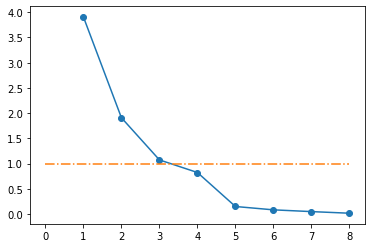

In [33]:
y = a['Total']
x = np.arange(len(y))+1
plt.scatter(x, y)
plt.plot(x, y)
plt.plot([0, 8], [1, 1], linestyle='-.')

,0,1,2,3,4,5,6,7
0,0.045144,-0.035300,0.890917,0.407819,0.056214,0.057215,-0.168838,0.041556
1,-0.218499,0.016026,-0.393865,0.886341,-0.034912,-0.091479,-0.040843,0.003958
2,0.483771,0.074611,0.093020,0.115204,-0.317366,-0.557980,0.550480,-0.152912
3,0.490501,0.060715,-0.117157,0.063411,-0.377399,0.231004,-0.221091,0.702354
4,0.471968,0.026036,-0.116248,0.082506,0.848952,-0.131099,-0.022262,0.133584
5,0.491718,0.063521,-0.109440,0.096659,-0.138694,0.402963,-0.302347,-0.678107
6,-0.073022,0.701977,0.012536,-0.098898,-0.049269,-0.464578,-0.521878,-0.036622
7,0.075641,-0.701256,-0.055776,-0.069706,-0.100433,-0.477759,-0.503636,-0.050584


In [84]:
sns.pairplot(df)

0.37583478906879014

In [109]:
pca.score_samples?

In [124]:
transformedDf = pd.DataFrame(pca.transform(dfNoResponseVariable_z), columns=['Component %d'%i for i in range(1, 1+n_components)])

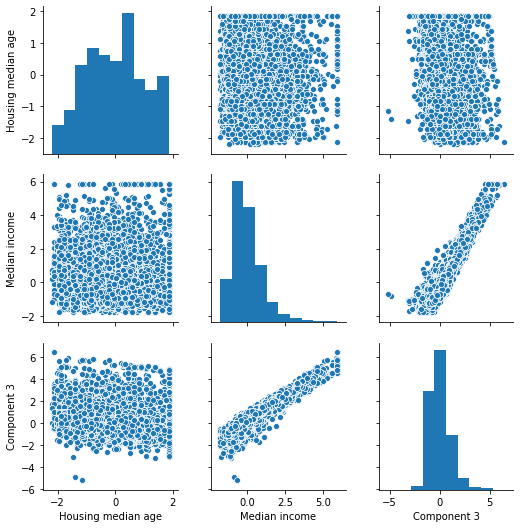

In [128]:
dfTmp = dfNoResponseVariable_z.loc[:, ('Housing median age','Median income')]
dfTmp['Component 3'] = transformedDf['Component 3']
sns.pairplot(dfTmp)
#([transformedDf[:,2]

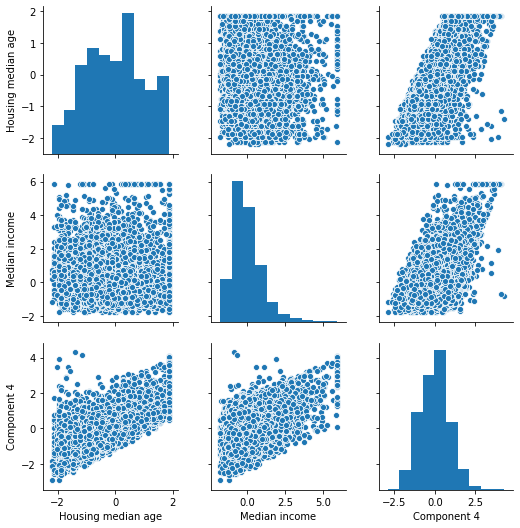

In [129]:
dfTmp = dfNoResponseVariable_z.loc[:, ('Housing median age','Median income')]
dfTmp['Component 4'] = transformedDf['Component 4']
sns.pairplot(dfTmp)
#([transformedDf[:,2]

In [138]:
tmp = pca.components_[:3,1]
print(tmp.dot(tmp))
tmp = pca.components_[:4,1]
print(tmp.dot(tmp))

0.20312804329145734
0.9887289413994071


In [144]:
df_adult = pd.read_csv('../data_sets/Clem3Training')

In [147]:
df_adult['capnet'] = df_adult['capital-gain']-df_adult['capital-loss']

In [150]:
adult = df_adult.iloc[:, [0,2,4,12,15]]

In [153]:
adultZ = (adult - adult.mean())/adult.std()

In [169]:
choose = np.random.rand(len(adultZ))
adultTest = adultZ[choose < .1]
adultTrain = adultZ[choose > .1]

In [173]:
chiSquareStatistic, pValue = calculate_bartlett_sphericity(adultTrain)
chiSquareStatistic, pValue

(1252.8378023667594, 2.8572354664867552e-263)

In [175]:
#Value of KMO less than 0.6 is considered inadequate.
kmoAll, kmoModel = calculate_kmo(df)

In [176]:
kmoModel

0.6572992447143272

In [195]:
fa = FactorAnalyzer(n_factors=5)
fa.fit(df)#analyze(df, 5, rotation=None)
ev, v = fa.get_eigenvalues()
ev

array([3.91243965, 1.92267742, 1.69686478, 0.91022813, 0.29332659,
       0.14252168, 0.0626448 , 0.04454859, 0.01474837])

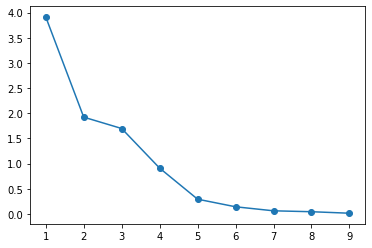

In [220]:
plt.scatter(1+np.arange(len(ev)), ev)
plt.plot(1+np.arange(len(ev)), ev)

In [198]:
fa.loadings_.shape

(9, 5)

In [223]:
fa = FactorAnalyzer(n_factors=2)
fa.fit(df)#analyze(df, 5, rotation=None)
ev, v = fa.get_eigenvalues()
ev

array([3.91243965, 1.92267742, 1.69686478, 0.91022813, 0.29332659,
       0.14252168, 0.0626448 , 0.04454859, 0.01474837])

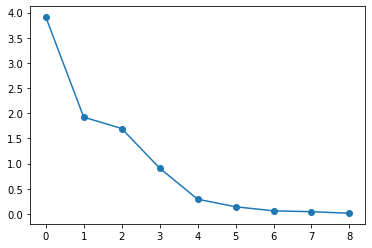

In [224]:
plt.scatter(range(len(ev)), ev)
plt.plot(range(len(ev)), ev)

In [225]:
fa.loadings_

array([[ 0.04411426, -0.06545372],
       [ 0.05979366, -0.05138616],
       [-0.33604919,  0.00166926],
       [ 0.98947655,  0.11679032],
       [ 1.0098701 ,  0.10204988],
       [ 0.9193248 ,  0.04942765],
       [ 1.01724757,  0.10570587],
       [ 0.21241955,  1.05953464],
       [-0.18510475, -0.96046049]])

In [231]:
fa3 = FactorAnalyzer(n_factors=2, rotation='varimax')
fa3.fit(adultTrain)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=2, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

In [232]:
tmp = pd.DataFrame(fa3.loadings_, columns=['PA%d'%(i+1) for i in range(fa3.loadings_.shape[1])])
tmp.index = adultTrain.columns
tmp * (abs(tmp) > .1)

,PA1,PA2
age,0.997202,0.000000
demogweight,-0.000000,-0.000000
education-num,0.000000,0.510932
hours-per-week,0.000000,0.286462
capnet,0.000000,0.224893


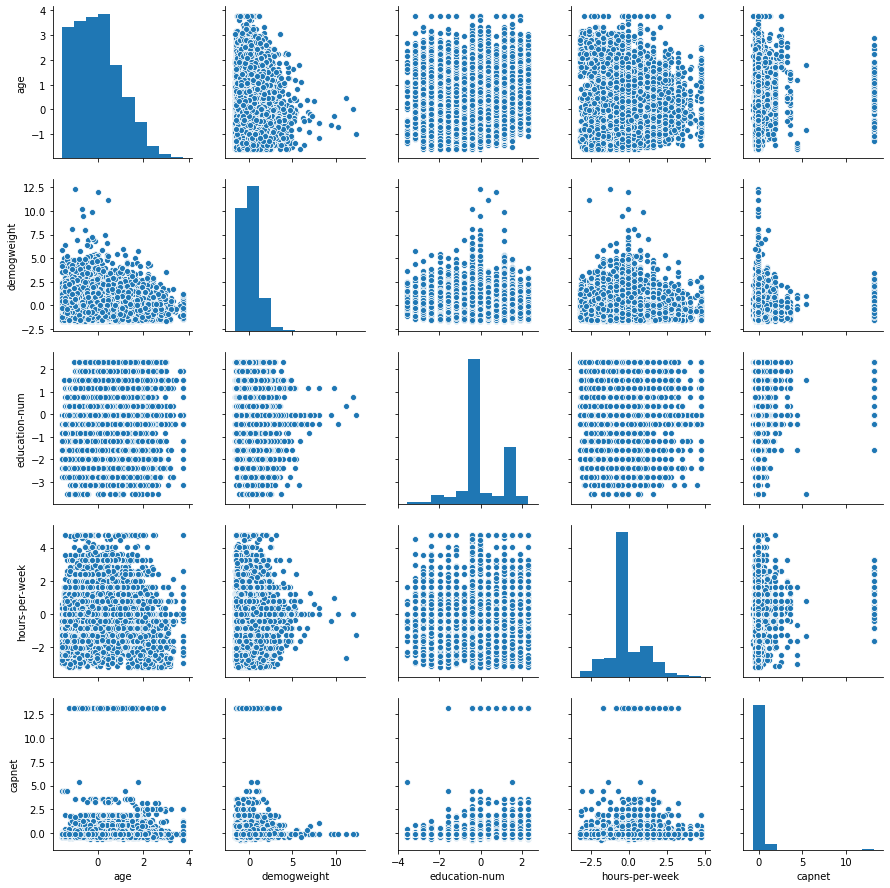

In [233]:
sns.pairplot(adultZ)